# Introduction

The goal of this tutorial is to walk you through some of the core modules used in Python for data analysis.  We're going to run through a simple example to get everyone on the same page.

## Jupyter

This document is a Jupyter Notebook, a tool for interactively running code interspersed with text and output.  You can create notebooks in a number of different programming languages like Python, R, or Julia.  Let's take a basic example using Python:

In [3]:
print("hello world")

hello world


You can modify the print statement above and rerun the corresponding "cell" to have it print whatever you want.

Jupyter notebooks are great for classes like this because you can run through the examples on your own machine with me live.

Before we get started, we're going to need to import a series of modules or libraries that will be used throughout the rest of the tutorial.  Modules are collections of pre-defined Python functions (and other objects) which you can use in your scripts.  Whereas libraries are larger collections of modules -- we'll mostly be dealing with libraries here though the distinction isn't important.

We import libraries as follows:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

It is also possible to import particular functions from a given module, for instance:

In [5]:
from numpy.linalg import norm

X = np.random.normal(size=(10, 10))
norm(X)

9.952611199459906

# Pandas

To start, we're going to spend most of our time using the module pandas.  Pandas is a data analysis library that contains many of the tools you'll want to use to work with data in Python.  Let's start by working with some real data:

## DataFrames

A dataframe is one of the core objects used in pandas.  It is essentially a matrix with additional metadata associated with the rows and columns.  For instance, the dataframe might have an index which corresponds to days of the week, while each column corresponds to a different assets returns.

One great thing about pandas is how easy it is to load data into Python.  You can even load data from the web, for instance lets use the following command to load a dataframe I've posted to github:

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/lbybee/pytutorial/master/49_ind_portfolios.csv")
df

,date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,20200102,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
1,20200103,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2,20200106,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
3,20200107,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
4,20200108,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,20200624,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
121,20200625,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
122,20200626,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194
123,20200629,0.0122,0.0150,0.0180,0.0201,0.0253,0.0048,0.0183,0.0208,0.0208,...,0.0259,0.0265,0.0294,0.0078,0.0262,0.0164,0.0142,0.0262,0.0120,0.0155


What I've done is imported a csv table into a dataframe from the internet!  You can do a lot more than this with pandas.  It can work with many data files, I'd encourage you to check out all the IO options here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Now, what do we have in terms of data?

These are daily returns for a series of industry portfolios taken from Kenneth French's website:

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

The first column is the date and the remaining columns are each portfolios returns.

How to I work with this dataframe?

I can access each column as follows:

In [7]:
df["Agric"]

0     -0.0251
1     -0.0100
2     -0.0052
3      0.0021
4      0.0052
        ...  
120   -0.0435
121    0.0074
122   -0.0104
123    0.0122
124    0.0218
Name: Agric, Length: 125, dtype: float64

This returns a __series__, which is just a column from a dataframe.  I can also look at multiple columns at once:

In [8]:
df[["Agric", "Food"]]

,Agric,Food
0,-0.0251,-0.0144
1,-0.0100,0.0041
2,-0.0052,-0.0009
3,0.0021,-0.0076
4,0.0052,-0.0017
...,...,...
120,-0.0435,-0.0161
121,0.0074,0.0045
122,-0.0104,-0.0196
123,0.0122,0.0150


Note that I specified these columns with a list as opposed to a single string, this returned a sub-matrix corresponding to a sub-dataframe instead of a series.

## Numpy

Pandas is build on top of numpy -- a module I introduced in our previous TA session.

numpy is the core library used for linear algebra in Python and has many tools you'll end up using throughout the class.

The dataframe above is really just a wrapper around numpy, and I can access the raw values if I want:

In [9]:
df["Agric"].values

array([-0.0251, -0.01  , -0.0052,  0.0021,  0.0052,  0.0013, -0.0103,
        0.0092,  0.0007,  0.0016,  0.0181, -0.0265, -0.0156,  0.0083,
        0.0094, -0.0166, -0.0254,  0.0117,  0.0044,  0.0441, -0.0119,
        0.0374,  0.024 ,  0.0221, -0.0042, -0.0163, -0.0102, -0.0017,
        0.0113, -0.0083,  0.0017,  0.0191,  0.0023,  0.003 , -0.0104,
       -0.0175, -0.0659,  0.0004, -0.0386, -0.0066,  0.0423, -0.0114,
        0.0332, -0.0488, -0.0627, -0.0843,  0.1061, -0.0403, -0.1066,
        0.1073, -0.1449,  0.0858, -0.0598,  0.076 , -0.0231, -0.0275,
        0.0239,  0.0431,  0.0381, -0.0326,  0.033 , -0.0157, -0.0478,
       -0.0163,  0.0125,  0.0655,  0.0037,  0.0585,  0.0634, -0.0417,
       -0.0037, -0.0324, -0.0107,  0.0148, -0.031 , -0.0141,  0.0276,
        0.0169,  0.0295, -0.0129,  0.0221,  0.0354, -0.0359, -0.0222,
       -0.0005,  0.021 , -0.0366,  0.0461, -0.0079, -0.0538, -0.038 ,
       -0.0059,  0.0076, -0.0143,  0.0497, -0.0042,  0.0428, -0.0162,
       -0.0009,  0.0

I can do many linear algebra operations on the dataframe itself, and these will behave you would expect:

In [10]:
df[["Agric", "Food", "Soda", "Beer"]].T.dot(df["Agric"])

Agric    0.169368
Food     0.075034
Soda     0.087186
Beer     0.093377
dtype: float64

What I've done here is taken the dot product between a series of columns, "Agric", "Food", "Soda", and "Beer", with the column "Agric".

## Data Operations

I can do many standard transformations to my dataframe and they'll behave as you expect:

In [11]:
np.square(df[["Agric", "Food"]])

,Agric,Food
0,0.000630,2.073600e-04
1,0.000100,1.681000e-05
2,0.000027,8.100000e-07
3,0.000004,5.776000e-05
4,0.000027,2.890000e-06
...,...,...
120,0.001892,2.592100e-04
121,0.000055,2.025000e-05
122,0.000108,3.841600e-04
123,0.000149,2.250000e-04


In some cases the operations are contained within the dataframe:

In [12]:
df[["Agric"]].cumsum()

,Agric
0,-0.0251
1,-0.0351
2,-0.0403
3,-0.0382
4,-0.0330
...,...
120,-0.0446
121,-0.0372
122,-0.0476
123,-0.0354


## Dates

Our date column behaves differently from the other columns, how should we treat this separately?

First, we can convert the date into a datetime which will allow us to perform operations which make assumptions based on date (we'll see more on these later):

In [13]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["date"]

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
120   2020-06-24
121   2020-06-25
122   2020-06-26
123   2020-06-29
124   2020-06-30
Name: date, Length: 125, dtype: datetime64[ns]

I can now access various datetime information from our date variable:

In [14]:
df["date"].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
120    2020
121    2020
122    2020
123    2020
124    2020
Name: date, Length: 125, dtype: int64

In [15]:
df["date"].dt.dayofweek

0      3
1      4
2      0
3      1
4      2
      ..
120    2
121    3
122    4
123    0
124    1
Name: date, Length: 125, dtype: int64

You can explore more on this here:

https://pandas.pydata.org/docs/user_guide/timeseries.html

I'd recommend checking this out if you intend to use Python long-term.

## The Index

If I print my dataframe again, I will see a "column" on the left corresponding to a series of integers:

In [16]:
df

,date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
1,2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2,2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
3,2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
4,2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2020-06-24,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
121,2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
122,2020-06-26,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194
123,2020-06-29,0.0122,0.0150,0.0180,0.0201,0.0253,0.0048,0.0183,0.0208,0.0208,...,0.0259,0.0265,0.0294,0.0078,0.0262,0.0164,0.0142,0.0262,0.0120,0.0155


This corresponds to the index for my dataframe.  I'm not going to spend too much time on indexes here, they can allow you to do some cool stuff, but one thing we may want to do here is set our date as the index:

In [17]:
dfdt = df.set_index("date")
dfdt

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,-0.0282,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,0.0070,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
2020-06-26,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,-0.0513,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194


Now, all my columns should have the same type, and I can perform some dataframe wide operations:

In [18]:
dfdt.T.dot(dfdt)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,0.169368,0.075034,0.087186,0.093377,0.094637,0.109152,0.103493,0.107307,0.081681,0.122136,...,0.110933,0.123669,0.120144,0.077427,0.114140,0.156823,0.127322,0.161789,0.136653,0.108066
Food,0.075034,0.064452,0.064095,0.076639,0.070527,0.072294,0.058678,0.065047,0.066648,0.078408,...,0.076277,0.074003,0.076809,0.055368,0.066719,0.093177,0.085472,0.088154,0.088941,0.070698
Soda,0.087186,0.064095,0.091631,0.086615,0.082898,0.079685,0.063972,0.079711,0.075049,0.096544,...,0.089740,0.090103,0.092554,0.058619,0.079586,0.114941,0.100633,0.115510,0.102543,0.082845
Beer,0.093377,0.076639,0.086615,0.108239,0.091651,0.092711,0.073502,0.082849,0.088547,0.100531,...,0.098670,0.094420,0.099830,0.072598,0.083783,0.118864,0.109260,0.114740,0.112909,0.086357
Smoke,0.094637,0.070527,0.082898,0.091651,0.103447,0.085047,0.073650,0.090886,0.079542,0.101808,...,0.093863,0.097385,0.099800,0.063845,0.087813,0.122243,0.108978,0.124757,0.110992,0.091215
Toys,0.109152,0.072294,0.079685,0.092711,0.085047,0.162052,0.112437,0.098116,0.071955,0.127570,...,0.100530,0.120930,0.118329,0.082234,0.120651,0.138874,0.122696,0.147397,0.123596,0.098076
Fun,0.103493,0.058678,0.063972,0.073502,0.073650,0.112437,0.121646,0.091226,0.062666,0.099754,...,0.079836,0.105358,0.096956,0.075714,0.100697,0.118898,0.103065,0.124136,0.106049,0.082906
Books,0.107307,0.065047,0.079711,0.082849,0.090886,0.098116,0.091226,0.126978,0.072455,0.117351,...,0.101701,0.119299,0.113763,0.064541,0.109381,0.146415,0.116674,0.154843,0.122165,0.101285
Hshld,0.081681,0.066648,0.075049,0.088547,0.079542,0.071955,0.062666,0.072455,0.084462,0.086562,...,0.089003,0.082318,0.085173,0.063610,0.071923,0.106714,0.094909,0.101179,0.098849,0.078618
Clths,0.122136,0.078408,0.096544,0.100531,0.101808,0.127570,0.099754,0.117351,0.086562,0.152394,...,0.118622,0.132672,0.131674,0.078483,0.132927,0.165885,0.138817,0.176877,0.144017,0.115629


Pandas can often handle much of the indexing and date work when you initially load the data:

In [19]:
dfdt = pd.read_csv("https://raw.githubusercontent.com/lbybee/pytutorial/master/49_ind_portfolios.csv",
                   index_col="date", parse_dates=True)
dfdt

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,-0.0282,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,0.0070,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
2020-06-26,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,-0.0513,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194


## Indexing

Dataframes allow for many ways to access subsets of the data.  For instance, let's say I want to only look at the returns in the first month of 2020:

In [20]:
dfdt[dfdt.index.month == 1]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
2020-01-09,0.0013,-0.0005,0.0164,0.0029,0.0056,-0.0026,-0.0018,-0.0154,0.0106,-0.0046,...,0.0145,0.0025,0.0029,0.0061,0.0086,0.0055,0.0027,0.0058,0.0097,0.0082
2020-01-10,-0.0103,0.0049,0.0050,-0.0053,-0.0083,-0.0232,-0.0145,-0.0038,0.0001,-0.0067,...,-0.0016,-0.0035,0.0021,-0.0066,-0.0045,-0.0058,-0.0027,-0.0083,-0.0044,-0.0079
2020-01-13,0.0092,0.0119,0.0102,0.0118,0.0068,0.0285,0.0208,0.0117,0.0077,0.0147,...,0.0170,0.0085,0.0004,0.0018,0.0011,0.0072,-0.0089,0.0063,0.0100,0.0132
2020-01-14,0.0007,-0.0015,-0.0018,0.0050,-0.0008,0.0028,0.0044,0.0152,0.0002,0.0046,...,-0.0049,0.0098,0.0063,-0.0024,0.0017,-0.0013,-0.0001,-0.0020,-0.0047,-0.0038


Alternatively, maybe I want to access all the rows where "Agric" returns are positive:

In [21]:
dfdt[dfdt["Agric"] > 0]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
2020-01-09,0.0013,-0.0005,0.0164,0.0029,0.0056,-0.0026,-0.0018,-0.0154,0.0106,-0.0046,...,0.0145,0.0025,0.0029,0.0061,0.0086,0.0055,0.0027,0.0058,0.0097,0.0082
2020-01-13,0.0092,0.0119,0.0102,0.0118,0.0068,0.0285,0.0208,0.0117,0.0077,0.0147,...,0.0170,0.0085,0.0004,0.0018,0.0011,0.0072,-0.0089,0.0063,0.0100,0.0132
2020-01-14,0.0007,-0.0015,-0.0018,0.0050,-0.0008,0.0028,0.0044,0.0152,0.0002,0.0046,...,-0.0049,0.0098,0.0063,-0.0024,0.0017,-0.0013,-0.0001,-0.0020,-0.0047,-0.0038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-18,0.0014,0.0040,0.0078,0.0081,0.0101,0.0156,-0.0021,-0.0139,0.0070,-0.0045,...,-0.0006,-0.0004,-0.0038,-0.0014,-0.0027,-0.0004,0.0007,-0.0019,-0.0019,-0.0027
2020-06-22,0.0129,-0.0011,-0.0049,-0.0018,-0.0077,0.0232,0.0130,0.0030,-0.0036,0.0227,...,-0.0068,-0.0008,0.0020,0.0117,0.0057,-0.0015,0.0000,-0.0008,-0.0006,0.0032
2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,0.0070,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125


This is referred to as boolean indexing, because the `dfdt["Agric"] > 0` term yields a series of truth values:

In [22]:
dfdt["Agric"] > 0

date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07     True
2020-01-08     True
              ...  
2020-06-24    False
2020-06-25     True
2020-06-26    False
2020-06-29     True
2020-06-30     True
Name: Agric, Length: 125, dtype: bool

I can also do this using multiple columns:

In [23]:
dfdt[(dfdt["Agric"] > 0) & (dfdt["Food"] > 0)]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-13,0.0092,0.0119,0.0102,0.0118,0.0068,0.0285,0.0208,0.0117,0.0077,0.0147,...,0.0170,0.0085,0.0004,0.0018,0.0011,0.0072,-0.0089,0.0063,0.0100,0.0132
2020-01-16,0.0181,0.0054,0.0043,0.0048,0.0003,0.0011,0.0074,0.0119,0.0020,0.0055,...,0.0121,0.0118,0.0082,0.0082,0.0093,0.0070,0.0107,0.0089,0.0225,0.0063
2020-01-23,0.0094,0.0016,0.0039,0.0030,-0.0164,0.0039,0.0319,-0.0040,-0.0031,-0.0172,...,0.0045,0.0177,0.0010,0.0002,0.0057,-0.0015,-0.0025,0.0031,-0.0016,0.0025
2020-01-30,0.0441,0.0229,0.0285,0.0079,-0.0151,0.0061,0.0130,0.0101,0.0053,-0.0052,...,-0.0054,-0.0058,-0.0018,0.0010,-0.0011,0.0123,0.0001,0.0025,0.0151,0.0099
2020-02-03,0.0374,0.0040,0.0043,0.0044,-0.0088,0.0141,0.0226,0.0012,0.0079,0.0171,...,0.0174,0.0052,-0.0026,0.0021,0.0053,0.0098,0.0081,0.0135,0.0047,-0.0039
2020-02-05,0.0221,0.0064,0.0003,0.0076,0.0004,-0.0097,0.0022,0.0206,0.0105,0.0022,...,0.0323,0.0076,0.0157,0.0089,0.0007,0.0167,0.0341,0.0090,0.0106,0.0144
2020-02-14,0.0017,0.0020,0.0052,0.0033,-0.0063,-0.0252,-0.0037,-0.0023,0.0060,0.0008,...,-0.0037,-0.0050,0.0012,-0.0023,-0.0017,0.0015,-0.0045,0.0000,0.0046,0.0029
2020-03-02,0.0423,0.0417,0.0448,0.0392,0.0393,0.0124,0.0114,0.0119,0.0564,0.0337,...,0.0492,0.0043,0.0334,0.0474,0.0289,0.0452,0.0593,0.0249,0.0462,0.0433
2020-03-04,0.0332,0.0404,0.0526,0.0443,0.0573,0.0283,0.0290,0.0212,0.0481,0.0329,...,0.0319,0.0390,0.0324,0.0377,0.0285,0.0301,0.0711,0.0248,0.0234,0.0404


This returns all the rows where both "Agric" and "Food" returns are positive.  The `&` is used for "and" and if I want do "or", I can use `|`.

I can also index as we did with numpy:

In [24]:
dfdt[:10]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
2020-01-09,0.0013,-0.0005,0.0164,0.0029,0.0056,-0.0026,-0.0018,-0.0154,0.0106,-0.0046,...,0.0145,0.0025,0.0029,0.0061,0.0086,0.0055,0.0027,0.0058,0.0097,0.0082
2020-01-10,-0.0103,0.0049,0.0050,-0.0053,-0.0083,-0.0232,-0.0145,-0.0038,0.0001,-0.0067,...,-0.0016,-0.0035,0.0021,-0.0066,-0.0045,-0.0058,-0.0027,-0.0083,-0.0044,-0.0079
2020-01-13,0.0092,0.0119,0.0102,0.0118,0.0068,0.0285,0.0208,0.0117,0.0077,0.0147,...,0.0170,0.0085,0.0004,0.0018,0.0011,0.0072,-0.0089,0.0063,0.0100,0.0132
2020-01-14,0.0007,-0.0015,-0.0018,0.0050,-0.0008,0.0028,0.0044,0.0152,0.0002,0.0046,...,-0.0049,0.0098,0.0063,-0.0024,0.0017,-0.0013,-0.0001,-0.0020,-0.0047,-0.0038


In [25]:
dfdt[9:12]

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-15,0.0016,-0.0007,0.0114,0.0140,0.0080,-0.0124,-0.0009,0.0080,0.0091,-0.0021,...,0.0120,0.0026,0.0061,-0.0044,0.0067,-0.0068,0.0106,0.0106,0.0038,0.0022
2020-01-16,0.0181,0.0054,0.0043,0.0048,0.0003,0.0011,0.0074,0.0119,0.0020,0.0055,...,0.0121,0.0118,0.0082,0.0082,0.0093,0.0070,0.0107,0.0089,0.0225,0.0063
2020-01-17,-0.0265,0.0007,0.0020,0.0067,0.0003,0.0075,0.0045,-0.0011,0.0034,0.0010,...,-0.0019,0.0012,-0.0055,-0.0010,0.0092,0.0055,0.0038,0.0031,0.0012,0.0015


If you're interested in checking out more about indexing I'd recommend the pandas wiki page:

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## Summaries and Aggregates

Now that we've explored how to manipulate the dataframe, let's put together some summaries of the data.

A basic command that you can run to get a good sense of your data is `describe`:

In [26]:
dfdt.describe()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.000109,-0.000056,-0.000822,0.000115,-0.000970,-0.000636,0.000451,-0.000813,0.000212,-0.000413,...,-0.000219,-0.000499,-0.00042,0.001631,-0.000670,-0.001545,-0.000401,-0.001462,0.000029,-0.001314
std,0.036958,0.022799,0.027171,0.029545,0.028867,0.036145,0.031318,0.031990,0.026098,0.035054,...,0.031944,0.033371,0.03227,0.023275,0.033897,0.041488,0.034980,0.044963,0.035963,0.029173
min,-0.144900,-0.087400,-0.092700,-0.112800,-0.097200,-0.158100,-0.152100,-0.127200,-0.088400,-0.138200,...,-0.100700,-0.114800,-0.12330,-0.096900,-0.147100,-0.146700,-0.147400,-0.174100,-0.131500,-0.097800
25%,-0.016600,-0.008800,-0.010800,-0.010400,-0.012900,-0.017100,-0.012200,-0.014500,-0.009700,-0.018900,...,-0.014800,-0.017500,-0.01230,-0.006900,-0.015800,-0.024900,-0.015400,-0.022700,-0.014300,-0.016300
50%,-0.000500,-0.000500,-0.001400,0.002900,0.000300,0.000700,0.004000,0.000800,0.000400,0.000800,...,-0.001200,0.002200,0.00120,0.003400,0.000900,-0.001300,0.001400,-0.001000,0.001700,-0.000300
75%,0.020600,0.007700,0.010000,0.008300,0.013200,0.016600,0.016800,0.014300,0.007700,0.018900,...,0.012700,0.013500,0.01480,0.009600,0.011400,0.016400,0.014200,0.018800,0.016000,0.012500
max,0.107300,0.090700,0.065400,0.114600,0.100300,0.141500,0.081800,0.085200,0.103000,0.136500,...,0.105500,0.126800,0.10640,0.073600,0.153000,0.137600,0.122000,0.120900,0.126400,0.106900


I can also run many other standard operations here:

In [27]:
dfdt[["Agric"]].mean()

Agric   -0.000109
dtype: float64

In [28]:
dfdt[["Agric"]].std()

Agric    0.036958
dtype: float64

In [29]:
dfdt[["Agric", "Food"]].aggregate(["mean", "std"])

,Agric,Food
mean,-0.000109,-0.000056
std,0.036958,0.022799


## Groupby

A very useful tool to understand in pandas is groupby.  Groupby is a way to apply operations to a subsets of your data in a systematic way.  For instance, what if I want to get the mean return for each asset for each month?

In [30]:
dfdt.groupby(pd.Grouper(freq="M")).mean()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,-0.001452,-0.000619,0.002462,0.001305,-0.001748,-0.001538,0.000595,-0.002052,0.000229,-0.002605,...,-0.000424,-0.000048,-0.001414,0.000610,0.000557,-0.001752,-0.001105,-0.000686,0.001333,0.000414
2020-02-29,-0.003074,-0.005079,-0.004395,-0.003984,-0.003516,-0.009653,-0.001763,-0.003426,-0.004563,-0.005095,...,-0.003763,-0.005921,-0.005063,-0.003221,-0.004879,-0.006268,-0.004632,-0.005274,-0.005742,-0.004474
2020-03-31,-0.003132,-0.000877,-0.006377,-0.002918,-0.001373,-0.007177,-0.006023,-0.010155,-0.001750,-0.007759,...,-0.002877,-0.006518,-0.007132,-0.000941,-0.008850,-0.009545,-0.004132,-0.016055,-0.005873,-0.005809
2020-04-30,0.004924,0.004038,0.002657,0.005281,0.001190,0.008362,0.006867,0.004448,0.004843,0.005624,...,0.003962,0.004405,0.006210,0.008357,0.008690,0.006090,0.005452,0.006924,0.006629,0.001476
2020-05-31,0.002930,0.001875,0.002140,0.000505,-0.000475,0.001185,0.001780,0.005850,0.001170,0.005735,...,0.001780,0.004165,0.004105,0.002120,0.001330,0.001860,0.002260,0.004070,0.003135,0.000855
2020-06-30,-0.000809,-0.000023,-0.001332,0.000268,-0.000136,0.004309,0.001368,0.000891,0.000991,0.001718,...,-0.000114,0.000850,0.000809,0.002505,-0.000777,0.000350,-0.000350,0.002650,0.000545,-0.000377


Since we are using a datetime index, I can group by this `pd.Grouper(freq="M")` object.  The `freq="M"` specifies what date frequency I want to use (in this case months), but I could specify other options, e.g. years or `freq="Y"`.

I can also groupby columns.  Let's assume we have another column corresponding to indicators for whether or not there is an FOMC meeting that day:

In [31]:
dfdt["FOMC"] = np.random.randint(0, 2, dfdt.shape[0])
dfdt.groupby("FOMC").mean()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
FOMC,,,,,,,,,,,,,,,,,,,,,
0,0.003446,0.001823,-0.000320,0.001196,0.001559,0.000958,0.002008,0.002817,0.001906,0.001756,...,0.002539,0.002589,0.002203,0.001648,0.002032,0.003524,0.001580,0.004432,0.003377,0.001656
1,-0.004783,-0.002526,-0.001483,-0.001306,-0.004294,-0.002731,-0.001596,-0.005585,-0.002015,-0.003265,...,-0.003846,-0.004559,-0.003869,0.001609,-0.004222,-0.008209,-0.003006,-0.009211,-0.004374,-0.005220


I can also groupby both values:

In [32]:
dfdt.groupby([pd.Grouper(freq="Q"), "FOMC"]).mean()

Agric      Food      Soda      Beer     Smoke      Toys  \
date       FOMC                                                               
2020-03-31 0     0.003716  0.000571 -0.001989  0.000211  0.000345 -0.001703   
           1    -0.012458 -0.006271 -0.004021 -0.005021 -0.006117 -0.012871   
2020-06-30 0     0.003136  0.003264  0.001603  0.002330  0.002958  0.004021   
           1     0.001357  0.000470  0.000547  0.001667 -0.002837  0.005380   

                      Fun     Books     Hshld     Clths  ...     Boxes  \
date       FOMC                                          ...             
2020-03-31 0     0.001237 -0.000587  0.000011 -0.001284  ...  0.001821   
           1    -0.008354 -0.012888 -0.005033 -0.011392  ... -0.008871   
2020-06-30 0     0.002897  0.006736  0.004088  0.005258  ...  0.003367   
           1     0.003810  0.000257  0.000400  0.003237  ...  0.000173   

                    Trans     Whlsl     Rtail     Meals     Banks     Insur  \
date       FOMC                                                               
2020-03-31 0     0.000705 -0.000184 -0.000045  0.002179  0.001474  0.000892   
           1    -0.011821 -0.011492 -0.002808 -0.014937 -0.017579 -0.009833   
2020-06-30 0     0.004758  0.004952  0.003597  0.001864  0.005885  0.002373   
           1     0.001250  0.002230  0.005143  0.004350 -0.000713  0.002457   

                    RlEst       Fin     Other  
date       FOMC                                
2020-03-31 0     0.001755  0.002463  0.000458  
           1    -0.022271 -0.012662 -0.009229  
2020-06-30 0     0.007515  0.004430  0.003036  
           1     0.001237  0.002257 -0.002013  

[4 rows x 49 columns]

This gives me the mean for each quarter/FOMC meeting pair.

Sometimes I may want to perform a groupby operation and update the original dataframe.  For instance, perhaps I want to subtract the monthly mean from each return series.  I can do this with the `transform` operation:

In [33]:
dfdt.groupby(pd.Grouper(freq="M")).transform(lambda x: x - x.mean())

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,FOMC
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.023648,-0.013781,-0.008262,-0.007605,-0.003052,0.006138,0.016005,0.008352,-0.009729,0.008905,...,0.012248,0.004214,0.008990,0.012043,0.010852,0.003205,0.002186,0.010467,0.013686,0.666667
2020-01-03,-0.008548,0.004719,-0.007962,-0.001405,0.003748,0.000838,-0.010795,0.000452,-0.006029,-0.000295,...,-0.006752,-0.006886,-0.008410,-0.005457,-0.009948,-0.004695,-0.004314,-0.009133,-0.007114,-0.333333
2020-01-06,-0.003748,-0.000281,-0.002662,0.003195,0.010248,0.018438,0.013805,0.000252,0.001871,0.003305,...,-0.004652,0.000314,0.005890,-0.000457,-0.001548,0.006505,-0.003614,0.000567,0.003086,-0.333333
2020-01-07,0.003552,-0.006981,-0.008862,-0.017705,0.002248,-0.019162,-0.006995,0.000652,-0.007329,0.000405,...,0.004148,-0.000486,-0.002710,-0.004357,-0.005948,-0.003695,-0.003914,0.000367,-0.003614,-0.333333
2020-01-08,0.006652,-0.001081,-0.000562,0.007995,0.017148,-0.002562,0.013005,0.002852,0.005671,0.002105,...,0.009948,0.006114,-0.003210,0.010143,0.011152,0.011905,-0.004014,0.002667,-0.001114,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.042691,-0.016077,-0.022168,-0.020168,-0.020664,-0.040409,-0.033668,-0.030291,-0.016691,-0.029918,...,-0.035850,-0.034609,-0.016605,-0.022423,-0.041550,-0.032250,-0.055550,-0.033745,-0.026623,0.636364
2020-06-25,0.008209,0.004523,0.009232,0.009332,0.007436,-0.002709,0.006632,0.010409,0.008209,0.005282,...,0.009150,0.006791,0.000895,-0.002423,0.027950,0.022050,0.017750,0.022455,0.012877,-0.363636
2020-06-26,-0.009591,-0.019577,-0.026468,-0.020168,-0.029964,-0.011209,-0.046768,-0.014291,-0.020291,-0.053018,...,-0.026450,-0.019409,-0.020405,-0.021323,-0.048950,-0.026450,-0.034050,-0.042645,-0.019023,-0.363636


This returns a dataframe of the same shape as the input.  The `lambda x: x - x.mean()` is a method for quickly defining functions inline -- in this case a function to demean.

Groupby is extremely powerful, I've only scratched the surface here, I'd encourage you to check out the corresponding wiki for more:

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

## Merging

I may at some point have multiple dataframes loaded and want to merge them.  For instance, perhaps I have a number of possible predictor variables for returns:

In [43]:
ffdf = pd.read_csv("https://raw.githubusercontent.com/lbybee/pytutorial/master/FF3.csv",
                   index_col="date", parse_dates=True)
dfdt = dfdt.drop(["FOMC"], axis=1, errors="ignore")
ffdf = dfdt.merge(ffdf, right_index=True, left_index=True)
print(ffdf.columns)
ffdf[["MktmRF", "SMB", "HML"]]

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other', 'MktmRF', 'SMB', 'HML', 'RF'],
      dtype='object')


,MktmRF,SMB,HML
date,,,
2020-01-02,0.0086,-0.0085,-0.0035
2020-01-03,-0.0067,0.0038,0.0000
2020-01-06,0.0036,-0.0007,-0.0050
2020-01-07,-0.0019,-0.0002,-0.0018
2020-01-08,0.0047,-0.0006,-0.0064
...,...,...,...
2020-06-24,-0.0261,-0.0052,-0.0128
2020-06-25,0.0112,0.0025,0.0050
2020-06-26,-0.0243,0.0016,-0.0137


Merging can get complex, here it is simple because of how the indices are defined but I'd recommend reading the wiki and verifying that the merge does what you expect (by examining the data) when you start doing this:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Matplotlib

So far we've put together some basic summaries of our data and explored how to manipulate dataframes.  However, often the best way to get a sense for a new data set is to draw some plots.

To do this we'll use the matplotlib library imported above:

https://matplotlib.org/

There are many other cool libraries available that I'd encourage you to check out as well, e.g. seaborn:

https://seaborn.pydata.org/

## Time Series Plots

Let's start by generating some basic time series plots to see how our returns behave.  I can start by plotting the cumulative returns for `"Agric"`:

Text(0, 0.5, 'Cumulative Return')

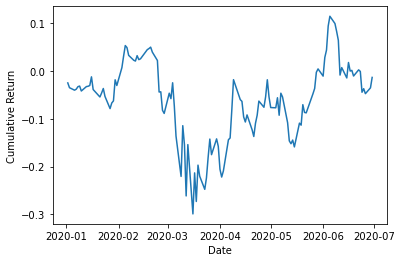

In [44]:
plt.plot(ffdf["Agric"].cumsum())
plt.xlabel("Date")
plt.ylabel("Cumulative Return")

What if I want to plot multiple return series alongside each other?

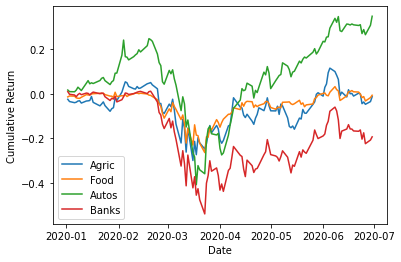

In [45]:
plt.plot(ffdf["Agric"].cumsum(), label="Agric")
plt.plot(ffdf["Food"].cumsum(), label="Food")
plt.plot(ffdf["Autos"].cumsum(), label="Autos")
plt.plot(ffdf["Banks"].cumsum(), label="Banks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

We only need to specify the column because our index is a date.  I could alternatively, tell matplotlib the `x` and `y` values separately:

Text(0, 0.5, 'Cumulative Return')

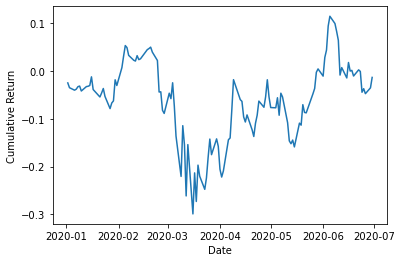

In [46]:
plt.plot(ffdf.index, ffdf["Agric"].cumsum().values)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")

## Scatter Plots

Does "Agric" have any market beta?  Let's look at a scatter plot to get a sense of the correlation:

Text(0, 0.5, 'Agric')

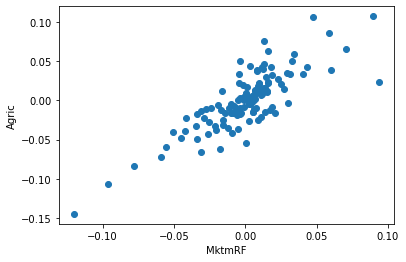

In [47]:
plt.scatter(ffdf["MktmRF"], ffdf["Agric"])
plt.xlabel("MktmRF")
plt.ylabel("Agric")

## Build-In Pandas Plotting

Pandas can also create a number of different plots on its own.

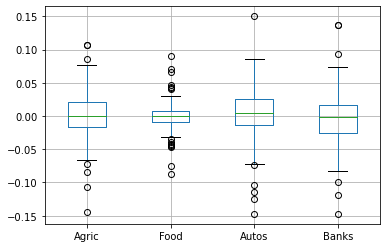

In [39]:
ffdf[["Agric", "Food", "Autos", "Banks"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207FD21FA90>,
      dtype=object)

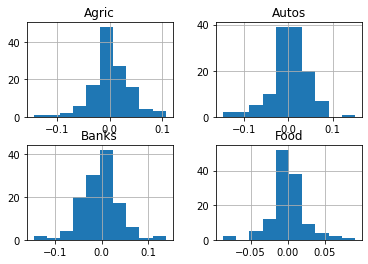

In [40]:
ffdf[["Agric", "Food", "Autos", "Banks"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207FD391400>,
      dtype=object)

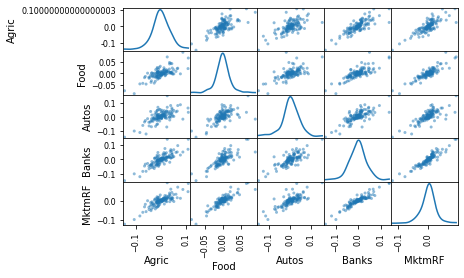

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(ffdf[["Agric", "Food", "Autos", "Banks", "MktmRF"]], diagonal="kde")

A full list of the pandas in-house plotting options are available here:


https://pandas.pydata.org/docs/user_guide/visualization.html

## Heatmaps

Matplotlib is a fairly established library with many useful tools and tricks.  You can spend a considerable amount of time refining your plots to get exactly what you want.  Let me show you one last cool example before we move forward:

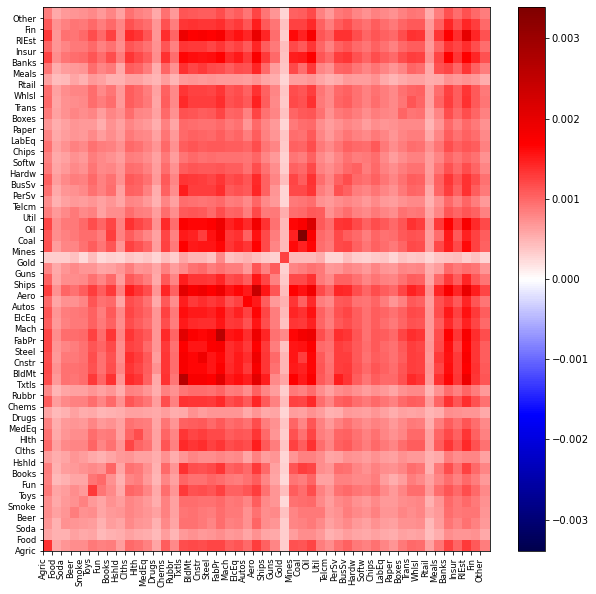

In [48]:
cov = dfdt.cov()
fig, ax = plt.subplots(figsize=(10, 10))
vlim = np.max([np.abs(np.min(cov)), np.max(cov)])
heatmap = ax.pcolor(cov.values, cmap=plt.cm.seismic, vmin=-vlim, vmax=vlim)
ax.set_xticks(np.arange(cov.shape[1]))
ax.set_xticklabels(cov.columns, rotation=90, fontsize="small")
ax.set_yticks(np.arange(cov.shape[1]))
ax.set_yticklabels(cov.index, fontsize="small")
plt.colorbar(heatmap)
plt.show()

# Statsmodels

While plots and descriptive summaries are nice, we often want fuller statistical models to understand asset prices.  There are a number of useful statistical libraries available in Python.  I'm just going to touch on two here and introduce you to methods for accessing more.

The first of these is statsmodels:

https://www.statsmodels.org/stable/index.html

## Regression

Let's fit a regression of our predictor variables on one of our return series:

In [49]:
import statsmodels.formula.api as smf

mod = smf.ols("Agric ~ MktmRF + HML + SMB", data=ffdf)
fit = mod.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Agric   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     94.16
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           1.69e-31
Time:                        15:12:07   Log-Likelihood:                 310.65
No. Observations:                 125   AIC:                            -613.3
Df Residuals:                     121   BIC:                            -602.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.002      0.299      0.766      -0.003       0.004
MktmRF         0.9455      0.071     13.261      0.000       0.804       1.087
HML            0.3508      0.125      2.811      0.006       0.104       0.598
SMB            0.1446      0.188      0.770      0.443      -0.227       0.517
==============================================================================
Omnibus:                        5.927   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                9.197
Skew:                          -0.084   Prob(JB):                       0.0101
Kurtosis:                       4.318   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sklearn

Statsmodels has many rigorous statistical methods, however for more "machine learning" applications, I'd recommend sklearn as a first stop:

https://scikit-learn.org/stable/

## Lasso/Penalized Models

The lasso is a useful tool for high-dimensional data sets.  If I have a large number of possible predictors, many of which have no association with my outcome variable, I can run a lasso to perform selection.  I won't go into the details of how this works but just show an example with our data above:

In [62]:
from sklearn import linear_model

noise = pd.DataFrame(np.random.normal(scale=0.1, size=(ffdf.shape[0], 100)), index=ffdf.index)
ldf = ffdf[["Agric", "MktmRF", "HML", "SMB"]].merge(noise, right_index=True, left_index=True)
mod = linear_model.Lasso(alpha=0.00075)
mod.fit(ldf.drop(["Agric"], axis=1), ldf["Agric"])
coef = pd.Series(mod.coef_, index=[c for c in ldf.columns if c != "Agric"])
coef[coef != 0]

MktmRF    0.147439
dtype: float64

# Other Libraries and Beyond

I've only touched on the very basics of what's possible in Python.  There are many other specialized libraries out there containing various useful functions.  As you explore these you'll want to get familiar with your package manager -- a tool for installing modules/libraries.

If you used Anaconda, you should be able to install packages by running:

`conda install <package>`

where `<package>` is the name of the library.  Otherwise one of the standard package manager in Python is pip:

`pip install <package>`.

In either case you can check out the document for more on this here:

https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/

https://pip.pypa.io/en/stable/reference/pip_install/